# NLP - Natural Language Process
## Bir metni bilgisayar diline çevirmeye yarar. Örneğin; modelimiz bir restorant ile ilgili kötü ve iyi yorumlar ile eğitilir. Bu eğitimin ardından yeni gelen bir yorumun iyi ya da kötü olup olmadığını anlayabilir. 

#

## import dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("gender-classifier-DFE-791531.csv", encoding = "latin1")
df.tail(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/11 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/15 13:19,6.587400e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/14 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/15 13:19,6.587400e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/14 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/15 13:19,6.587400e+17,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
data = pd.concat([df.gender,df.description],axis = 1)
data.head(7)

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,female,you don't know me.
6,brand,"A global marketplace for images, videos and mu..."


# data cleaning

In [5]:
# NaN verilerin temizlenmesi
data.dropna(axis = 0,inplace = True) # axis = 0 : satır olarak dropla

In [41]:
# cinsiyetlerin 1 ve 0 olarak ayrılması
data.gender = [1 if each == "female" else 0 for each in data.gender]
data.tail(7)

,gender,description
20043,0,"Head Chef, Chez Bruce. Loves Cars and Bicycles..."
20044,0,I Love Me...Myself....&....I
20045,0,(rp)
20046,0,"Whatever you like, it's not a problem at all. ..."
20047,0,#TeamBarcelona ..You look lost so you should f...
20048,0,Anti-statist; I homeschool my kids. Aspiring t...
20049,0,Teamwork makes the dream work.


### regular expression (RE)
#### 1 string üstünden cleaning incelenip ardından tüm dataset için uygulanacaktır

In [7]:
import re
test_description = data.description[4]
test_description

'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx'

In [8]:
test_description = re.sub("[^a-zA-Z]" , " ", test_description)
# a'dan z'ye VE A'dan Z'ye kadar charlardan olmayan(^) diğer charları " "(boşluk) ile değiştirir
# ve bu işlemi test_description için yapar

test_description = test_description.lower()
# tüm harfleri lower case yapar

test_description

'ricky wilson the best frontman kaiser chiefs the best band xxxx thank you kaiser chiefs for an incredible year of gigs and memories to cherish always    xxxxxxx'

### stopwords (irrelavent words) gereksiz kelimeler
#### örneğin : I go to the school and home - Bu cümledeki the,and vb. kelimeler gereksizdir. ayırt edici özelliğe sahip kelimeler değillerdir

In [11]:
import nltk
#natural language tool kit
nltk.download("stopwords") #stopwords kütüphanesini corpus'a indiriyorum
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bedirhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bedirhan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [12]:
test_description = nltk.word_tokenize(test_description)
#stringimi, içindeki kelimeler stopwords'ler ile eşleşiyor mu diye kontrol etmek için kelimelerine ayırıyorum
# tokenizer yerine .split() de kullanılabilir ama "shouldn't gibi kelimeler "should" ve "n't" şeklinde ayrılmaz
test_description

['ricky',
 'wilson',
 'the',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'the',
 'best',
 'band',
 'xxxx',
 'thank',
 'you',
 'kaiser',
 'chiefs',
 'for',
 'an',
 'incredible',
 'year',
 'of',
 'gigs',
 'and',
 'memories',
 'to',
 'cherish',
 'always',
 'xxxxxxx']

In [13]:
test_description = [each for each in test_description if not each in set(stopwords.words("english"))]
test_description

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'best',
 'band',
 'xxxx',
 'thank',
 'kaiser',
 'chiefs',
 'incredible',
 'year',
 'gigs',
 'memories',
 'cherish',
 'always',
 'xxxxxxx']

### Lemmatazation
#### ek almış veya değişmiş kelimelerin, kök hallerine erişmek için kullanılır. Örneğin ; Loved => Love

In [15]:
nltk.download('wordnet')
lemma = nltk.WordNetLemmatizer()
test_description = [lemma.lemmatize(each) for each in test_description]
test_description

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bedirhan\AppData\Roaming\nltk_data...


['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chief',
 'best',
 'band',
 'xxxx',
 'thank',
 'kaiser',
 'chief',
 'incredible',
 'year',
 'gig',
 'memory',
 'cherish',
 'always',
 'xxxxxxx']

#### Kelimeleri tekrardan birleştirerek bir string haline getirelim

In [17]:
test_description = " ".join(test_description)
# stringleri " " ile birleştirir

test_description

'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx'

## Tek string için gerçekleştirdiğimiz bu temizleme işlemlerini şimdi tüm data için yapalım

In [27]:
description_list = []
for text in data.description:
    text = re.sub("[^a-zA-Z]" , " ", text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [each for each in text if not each in set(stopwords.words("english"))]
    text = [lemma.lemmatize(each) for each in text]
    text = " ".join(text)
    description_list.append(text)

# Bag Of Words

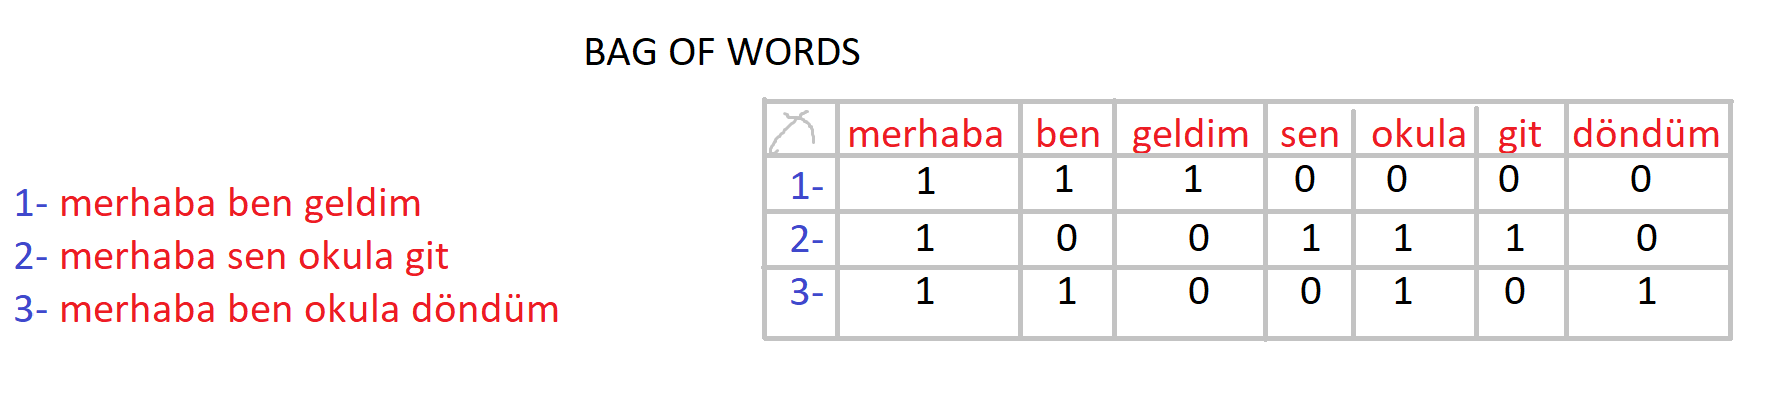

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 500
# kelime çok fazla olacağı için maksimum feature değeri oluşturulur

In [38]:
count_vectorizer = CountVectorizer(max_features = max_features , stop_words = "english") 
#stop_words parametre olarak da kullanılabilir

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
sparce_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
print("en sık kullanılan 500 kelime : " , count_vectorizer.get_feature_names_out())

en sık kullanılan 500 kelime :  ['account' 'activist' 'actor' 'addict' 'adult' 'adventure' 'advocate'
 'alum' 'amazing' 'america' 'american' 'angel' 'animal' 'anime' 'app'
 'area' 'art' 'artist' 'ask' 'aspiring' 'author' 'award' 'away' 'awesome'
 'baby' 'bad' 'band' 'based' 'beautiful' 'beauty' 'beer' 'believe' 'best'
 'better' 'big' 'bio' 'bit' 'bitch' 'black' 'blog' 'blogger' 'blue' 'book'
 'booking' 'born' 'bot' 'boy' 'brand' 'breaking' 'building' 'business'
 'ca' 'car' 'care' 'cat' 'cause' 'ceo' 'certified' 'change' 'channel'
 'check' 'chicago' 'chief' 'child' 'christ' 'christian' 'city' 'class'
 'club' 'coach' 'coffee' 'college' 'com' 'come' 'comic' 'coming'
 'communication' 'community' 'company' 'computer' 'conservative'
 'consultant' 'contact' 'content' 'continuous' 'control' 'cool' 'country'
 'county' 'crazy' 'create' 'creative' 'creator' 'culture' 'currently'
 'dad' 'daily' 'dance' 'data' 'day' 'deal' 'dedicated' 'design' 'designer'
 'developer' 'development' 'die' 'digital' '

In [45]:
y = data["gender"].values
x = sparce_matrix

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1 , random_state = 0)

## Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

### prediction

In [62]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
y_test_reshaped = np.reshape(y_test, (-1, 1))
y_pred_reshaped = np.reshape(y_pred, (-1, 1))
accuracy = nb.score(y_pred_reshaped, y_test_reshaped)
print("accuracy:", accuracy)

accuracy: 1.0
